<a href="https://colab.research.google.com/github/illostephanie4/breast_cancer_prediction/blob/main/Breast_Cancer_Dataset_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Breast Cancer Dataset Classifier**

The following link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data contains data that correlates the features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. It is used to classify the mass as either benign (B) or malignant (M).

You are required to implement a 3-layer neural network to classify a breast mass sample based on this dataset. Ensure each step of the process is properly documented using a text block in your notebook just before the code block. Implement in a Jupyter Notebook and submit the link below.



#### **Requirements:**

- Implement a 90% - 10% test train split. Ensure your data is well shuffled before splitting.
- Your neural network should have 2 hidden and 1 output layers.
- Use the ReLU activation for hidden layers and the sigmoid function for the output layer.
- Train your model with with SGD optimizer and choose an appropriate learning rate and criterion.
- Implement L2 regularization in your model to avoid overfitting.
- Your model must achieve 99% accuracy on the test dataset
- Implement early stopping to minimize computational resources
- At the end of the training print out the following:
  - Accuracy of the model on the validation data
  - Number of epochs to get to that accuracy
  - Criterion used

**Importing Libraries**

In [ ]:
import kagglehub as kh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch.optim import SGD

**Downloading the breast cancer dataset**

In [ ]:
"""
Download the breast dataset
"""
path = kh.dataset_download("uciml/breast-cancer-wisconsin-data")

df = pd.read_csv(path + "/data.csv")

df.head()

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


**Implement feature engineering on the data.**

Steps:
1. Drop unnecessary columns (id, Unnamed: 32).
2. Encode diagnosis column: M -> 1, B -> 0.
3. Standardize features using StandardScaler.

In [ ]:
# Drop irrelevant columns
processed_df = df.drop(columns=["id", "Unnamed: 32"])

# Separate features and target
X = processed_df.drop("diagnosis", axis=1)
y = (processed_df["diagnosis"] == "M").astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = X_scaled
y = y.values
print(X)
print(y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0

**Train-Test Split (90% -10%)**

Split processed dataframe into train and test sets.

We stratify to preserve class distribution.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=42,
    stratify=y
)


**Convert numpy arrays to PyTorch tensors.**

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

**Implement a 3-layer neural network:**

Input -> Hidden1 -> Hidden2 -> Output

**Activation:**

Hidden layers: ReLU

Output layer: Sigmoid

In [ ]:
input_size = X_train.shape[1]

model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Sigmoid()
)

**Define hyperparameters.**

We use:
- SGD optimizer
- Learning rate chosen for stable convergence
- BCELoss as criterion
- L2 regularization using weight_decay

In [ ]:
epochs = 1000
learning_rate = 0.075
criterion = nn.BCELoss()

optimizer = SGD(
    model.parameters(),
    lr=learning_rate,
    weight_decay=0.001  # L2 Regularization
)


**Neural network training loop with:**

- Accuracy tracking
- Validation loss computation
- Early stopping based on validation loss

In [ ]:
train_losses = []
val_losses = []
train_accuracy = []
val_accuracy = []

best_val_loss = float("inf")
patience = 50
patience_counter = 0
best_epoch = 0

for epoch in range(epochs):

    # ----- TRAIN -----
    model.train()

    y_hat = model(X_train)
    loss = criterion(y_hat, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Training accuracy
    preds = (y_hat >= 0.5).float()
    acc = (preds == y_train).float().mean()
    train_accuracy.append(acc.item())

    # ----- VALIDATION -----
    model.eval()
    with torch.no_grad():
        val_preds = model(X_val)
        val_loss = criterion(val_preds, y_val)
        val_losses.append(val_loss.item())

        val_preds_binary = (val_preds >= 0.5).float()
        val_acc = (val_preds_binary == y_val).float().mean()
        val_accuracy.append(val_acc.item())

    # ----- EARLY STOPPING -----
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_epoch = epoch + 1
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch+1}")
        break

Early stopping at epoch 461


**Plot training losses**

In [ ]:
def plot_losses(plt, title, train_losses, val_losses, label):
    plt.plot(train_losses, label=f"Train {label}")
    plt.plot(val_losses, label=f"Validation {label}")
    plt.legend()
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel(label)

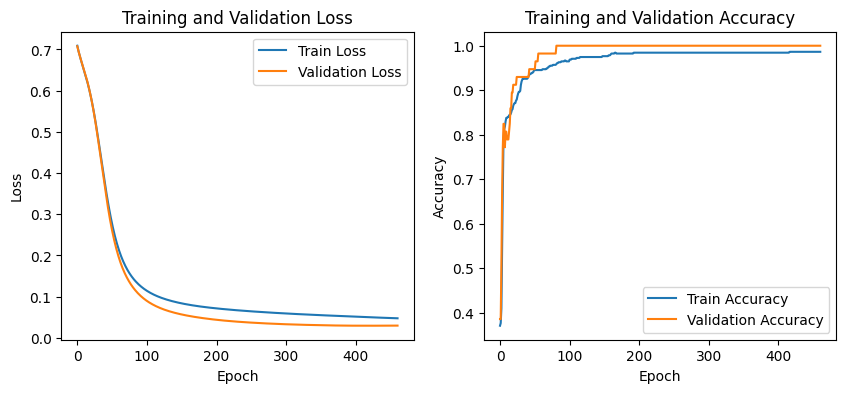

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plot_losses(plt, "Training and Validation Loss", train_losses, val_losses, label="Loss")
plt.subplot(1, 2, 2)
plot_losses(plt, "Training and Validation Accuracy", train_accuracy, val_accuracy, label="Accuracy")
plt.show()


**At the end of the training print out the following:**

* Accuracy of the model on the validation data

* Number of epochs to get to that accuracy

* Criterion used

In [ ]:
final_accuracy = val_accuracy[-1]

print(f"Accuracy of the model on validation data: {final_accuracy * 100:.2f}%")
print(f"Number of epochs to get to that accuracy: {best_epoch}")
print(f"Criterion used: {criterion}")

Accuracy of the model on validation data: 100.00%
Number of epochs to get to that accuracy: 411
Criterion used: BCELoss()
